In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.interpolate import griddata
import numpy as np
from scipy.interpolate import Rbf

In [3]:
coordinates_df = pd.read_csv("data/UW_coords.csv")
uw_coords = np.array([(coordinates_df["X"][i], -1 * coordinates_df["Y"][i]) for i in range(len(coordinates_df))])
len(uw_coords)

54

In [4]:
uw_vf = pd.read_csv("data/UW_VF_Data.csv")
pt_1 = np.array(uw_vf.iloc[0][22:76]).astype(int) #VF range
len(pt_1)

54

In [5]:
uw_vf
# cropped = uw_vf.drop(uw_vf.columns[[1]], axis = 1)
# cropped = cropped.drop(cropped.columns[np.r_[3:21]], axis = 1)
# cropped = cropped.drop(cropped.columns[np.r_[57:165]], axis = 1)
# cropped['Eye'] = cropped['Eye'].replace({'Right': 'OD', 'Left': 'OS'})
# cropped

,PatID,Gender,Eye,FieldN,Age,Time_from_Baseline,MS,MS_Cluster1,MS_Cluster2,MS_Cluster3,...,PD_45,PD_46,PD_47,PD_48,PD_49,PD_50,PD_51,PD_52,PD_53,PD_54
0,647,F,Right,1,52.7967,0.0000,27.832885,25.57750,26.979231,30.588333,...,-1.92,-0.36,-0.44,-1.52,-0.03,-1.06,0.75,-1.33,-2.02,-0.61
1,647,F,Right,2,53.8234,1.0267,30.131346,27.76000,29.911538,33.263333,...,-0.54,-1.13,-1.81,-1.74,-2.19,-1.23,-4.85,-2.24,0.00,0.28
2,647,F,Right,3,54.8857,2.0890,29.454808,25.47500,29.826154,32.488333,...,-0.07,1.56,-2.09,0.07,-0.84,-2.45,-0.48,-4.10,-1.28,-4.07
3,647,F,Right,4,57.7331,4.9363,27.947885,23.75625,28.658462,31.431667,...,-2.57,-1.74,-0.52,-2.70,-1.48,-3.32,-3.00,-6.49,-2.19,-2.76
4,647,F,Right,5,58.7680,5.9713,27.644038,24.90250,28.104615,30.105000,...,-0.80,-0.93,-3.08,-2.55,-3.26,-3.13,-1.42,-0.18,-1.02,-2.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28938,7324,F,Left,2,65.6537,0.2163,27.471923,25.32125,25.657692,30.785000,...,0.30,-3.89,-4.68,-3.45,-0.88,-0.72,0.00,-2.81,-0.83,-2.02
28939,6859,M,Right,1,79.4114,0.0000,23.916346,26.37000,15.611538,15.225000,...,-0.43,-0.71,-3.52,0.00,-0.60,1.05,-3.96,-2.23,0.25,-2.06
28940,6859,M,Right,2,80.6598,1.2485,23.475192,23.74500,13.599231,22.355000,...,0.00,-0.85,-0.70,0.20,-0.16,-1.95,1.20,-3.11,-1.91,-0.93
28941,1142,NaN,Left,1,67.3155,0.0000,27.896923,26.95250,29.080000,30.493333,...,-4.77,-4.94,-9.38,-6.18,-2.88,-2.18,-2.61,-3.51,-2.83,-0.09


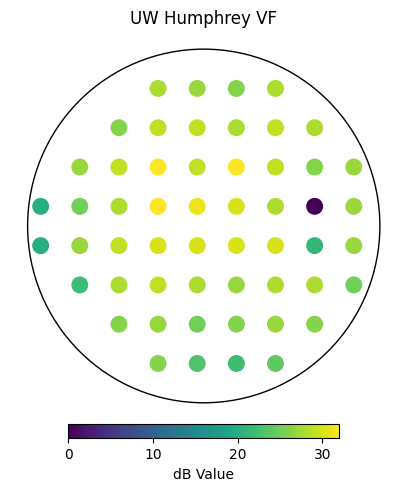

In [10]:
id_1 = np.array(uw_vf.iloc[0][22:76]).astype(int)
fig, ax = plt.subplots(figsize = (5,6))

im = ax.scatter(uw_coords[:,0], uw_coords[:,1], c= id_1, s=500, marker='.')
circle = mpatches.Circle((-2,0), 27, fill = False)
ax.add_patch(circle)
cbar = plt.colorbar(im, ax=ax, orientation = 'horizontal', shrink = 0.7, pad = 0.008)
cbar.set_label("dB Value")

plt.axis('off')
plt.title("UW Humphrey VF")
plt.savefig('images/UW_VF.png')

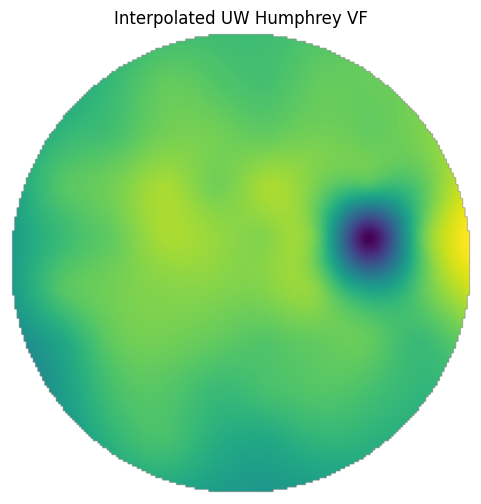

In [10]:
id_1 = np.array(uw_vf.iloc[0][22:76]).astype(int)


all_coords = np.vstack([uw_coords])
all_values = np.concatenate([id_1])

grid_x, grid_y = np.mgrid[-27:27:200j, -27:27:200j]
rbf = Rbf(all_coords[:,0], all_coords[:,1], all_values, function='thin_plate')
grid_z = rbf(grid_x, grid_y)

radius = 27
mask = np.sqrt(grid_x**2 + grid_y**2) <= radius
masked_grid = np.where(mask, grid_z, np.nan)

fig, ax = plt.subplots(figsize = (6,6))
ax.imshow(masked_grid.T, extent=(-27,27,-27,27), origin='lower', cmap='viridis')
#ax.scatter(uw_coords[:,0], uw_coords[:,1], c= id_1, s=100, marker='s')
plt.title("Interpolated UW Humphrey VF")
plt.axis('off')
plt.show()

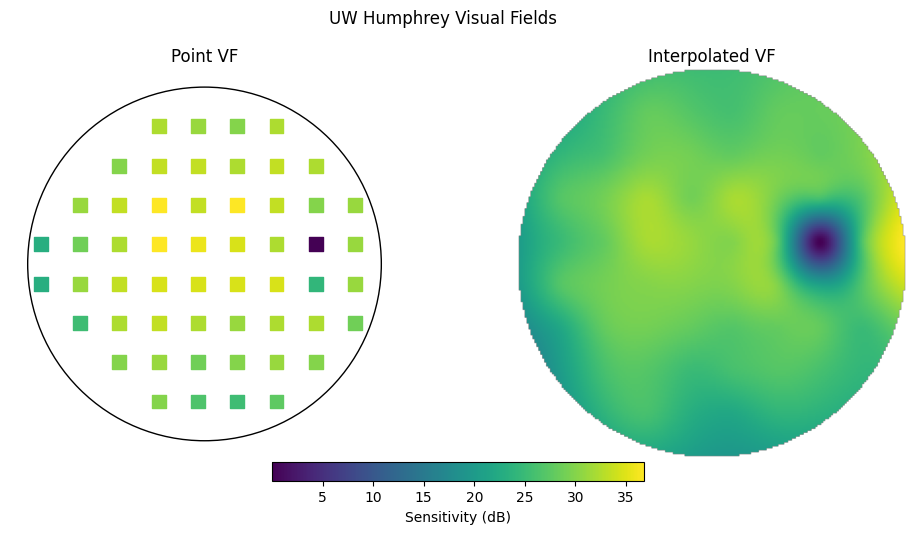

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))

ax[0].scatter(uw_coords[:,0], uw_coords[:,1], c= id_1, s=100, marker='s')
circle = mpatches.Circle((-2,0), 27, fill = False)
ax[0].add_patch(circle)
ax[0].set_title('Point VF')
ax[0].axis('off')

#--------------------------------

all_coords = np.vstack([uw_coords])

grid_x, grid_y = np.mgrid[-27:27:200j, -27:27:200j]
rbf = Rbf(all_coords[:,0], all_coords[:,1], id_1, function = 'thin_plate')
grid_z = rbf(grid_x, grid_y)

radius = 27
mask = np.sqrt(grid_x**2 + grid_y**2) <= radius
masked_grid = np.where(mask, grid_z, np.nan)

im = ax[1].imshow(masked_grid.T, extent=(-27,27,-27,27), origin = 'lower', cmap = 'viridis')
ax[1].set_title("Interpolated VF")
ax[1].axis('off')

fig.suptitle("UW Humphrey Visual Fields")

ax[0].set_aspect('equal')
ax[1].set_aspect('equal')
bar = fig.colorbar(im, orientation = 'horizontal', ax = ax, shrink = 0.4, pad = 0.008)
bar.set_label('Sensitivity (dB)')
plt.savefig('images/example_uw_visual_fields.png', bbox_inches = 'tight')

# NPY Visual

Each pt in the UW dataset is saved in an npy file as `PT#_EYE_VF#.npy`

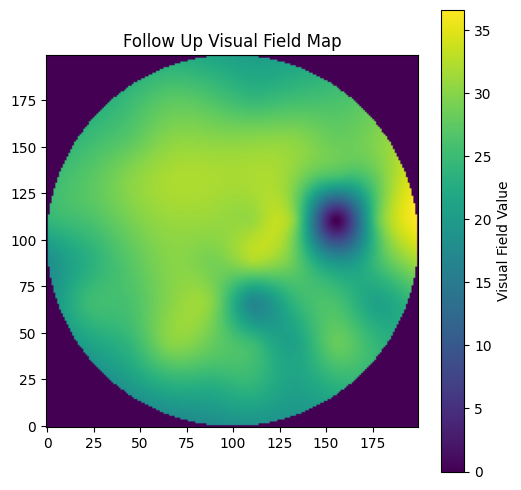

In [ ]:
x = np.load("images/UW/642_OD_1.npy")

values = x[:, :, 0]

plt.figure(figsize=(6,6))
plt.imshow(values, cmap='viridis', origin='lower')
plt.colorbar(label='Visual Field Value')
plt.title('Visual Field Map')
plt.show()

In [39]:
df = pd.read_pickle('UW.pkl')
df

Visit Number,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
ID,,,,,,,,,,,,,,,,,,,
1-OD,"[10, 9, -1, 10, 21, 24, 21, 18, 20, 19, 17, 23...","[19, 20, 22, 20, 19, 24, 22, 24, 25, 23, 17, 2...","[15, 23, 20, 21, 26, 24, 26, 28, 26, 25, 19, 2...","[13, 16, 11, 6, 5, 22, 24, 20, 23, 23, 18, 23,...","[21, 19, 19, 14, 19, 24, 23, 17, 21, 22, 17, 2...","[23, 21, 18, 20, 23, 26, 24, 22, 24, 22, 18, 2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-OS,"[-1, 17, -1, -1, 19, 23, 18, 18, 25, 20, 18, 2...","[11, -1, 8, -1, 10, 17, 20, 19, 21, 25, 16, 22...","[11, 9, -1, 10, 22, 23, 21, 10, 23, 18, 19, 24...","[7, -1, 3, -1, 15, 21, 14, 15, 18, 15, 15, 22,...","[9, 10, -1, 16, 19, 22, 23, 18, 23, 21, 11, 24...","[16, 17, 16, 20, 17, 16, 21, 21, 23, 24, 21, 2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000-OD,"[23, 23, 23, 20, 25, 26, 24, 19, 22, 16, 25, 2...","[27, 26, 21, 24, 28, 28, 25, 21, 21, 21, 28, 2...","[23, 18, 17, 21, 24, 26, 24, 21, 20, 19, 23, 2...","[19, 20, 16, 22, 29, 24, 26, 24, 13, 10, 22, 2...","[21, 13, 10, 15, 23, 21, 14, 17, 16, 15, 5, 21...","[12, 14, 8, 10, 11, 16, 16, 11, 16, 11, 12, 12...","[2, 4, 5, 9, 2, 13, 19, 13, 13, 13, 13, 17, 18...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000-OS,"[16, 21, 15, 16, 19, 11, -1, 19, 6, 17, 19, 23...","[4, 22, 21, 20, 1, 11, 18, 20, 24, 21, 12, 24,...","[-1, 5, 15, 18, 11, 23, 18, 21, 15, 15, 20, 25...","[18, 17, 13, -1, 9, 12, 15, 8, 19, 18, 11, 17,...","[-1, 15, 21, 12, 13, 6, 8, 7, 16, 22, 16, 26, ...","[14, 13, 16, 9, 15, 20, 14, -1, 16, 18, 13, 21...","[3, 13, 7, 7, -1, 11, 5, 7, 16, 16, 12, 20, 18...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1002-OD,"[29, 26, 26, 27, 28, 29, 31, 27, 28, 26, 31, 3...","[25, 25, 24, 24, 23, 26, 26, 24, 25, 28, 23, 2...","[-1, 1, 6, 4, 5, 22, -1, 3, 5, 4, 4, 7, 26, 11...","[20, 21, 22, 18, 20, 25, 24, 24, 25, 25, 23, 2...","[23, 23, 22, 24, 22, 27, 26, 25, 27, 23, 24, 2...","[20, 20, 19, 19, 21, 21, 24, 24, 24, 25, 24, 2...","[24, 23, 24, 22, 22, 24, 24, 26, 26, 24, 27, 2...","[22, 24, 22, 26, 26, 27, 27, 29, 29, 27, 31, 2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993-OS,"[29, 25, 24, 30, 30, 31, 32, 31, 31, 30, 25, 3...","[34, 30, 32, 29, 35, 34, 34, 32, 32, 29, 30, 3...","[29, 31, 31, 30, 32, 31, 30, 29, 30, 26, 26, 3...","[28, 28, 27, 30, 31, 29, 30, 29, 31, 32, 30, 2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994-OD,"[31, 27, 27, 30, 33, 32, 31, 33, 32, 33, 30, 3...","[29, 28, 27, 35, 31, 29, 31, 31, 30, 33, 29, 3...","[27, 33, 26, 28, 28, 32, 31, 31, 33, 31, 32, 3...","[27, 27, 29, 30, 32, 26, 31, 32, 30, 33, 32, 3...","[30, 29, 31, 29, 32, 32, 31, 31, 30, 32, 34, 3...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994-OS,"[28, 32, 26, 32, 32, 33, 33, 31, 33, 33, 32, 3...","[30, 29, 26, 28, 29, 31, 31, 31, 30, 27, 28, 3...","[29, 31, 27, 26, 32, 30, 33, 32, 30, 31, 33, 3...","[30, 32, 29, 30, 32, 33, 33, 31, 32, 33, 32, 3...","[31, 32, 31, 34, 33, 32, 33, 31, 33, 28, 33, 3...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
